# Salesforce Project


In [ ]:
import yfinance as yf, pandas as pd, numpy as np
import os, shutil, kagglehub

## Data Preparations

### Get the stocks prices


In [ ]:
# https://gist.github.com/yashveersinghsohi/060d1dc1311142f387d1c0ba8267e230
# for dowloading S&P 500
TICKERS = ["AAPL","MSFT","GOOGL","AMZN","META","NVDA","TSLA","SPY", "^GSPC"]
START, END = "2015-01-01", None

data = yf.download(" ".join(TICKERS), start=START, end=END, auto_adjust=True, actions=True)

stacked = (data.stack(level=1)
        .rename_axis(index=["Date","Ticker"])
        .reset_index()
        .sort_values(["Ticker","Date"]))

stacked['Ticker'] = stacked['Ticker'].replace('^GSPC', 'S&P 500')
SP500_df = stacked[stacked['Ticker'] == 'S&P 500']

[*********************100%***********************]  9 of 9 completed
/tmp/ipython-input-2564575360.py:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked = (data.stack(level=1)


In [ ]:
SP500_df

Price,Date,Ticker,Capital Gains,Close,Dividends,High,Low,Open,Stock Splits,Volume
8,2015-01-02,S&P 500,NaN,2058.199951,0.0,2072.360107,2046.040039,2058.899902,0.0,2708700000
17,2015-01-05,S&P 500,NaN,2020.579956,0.0,2054.439941,2017.339966,2054.439941,0.0,3799120000
26,2015-01-06,S&P 500,NaN,2002.609985,0.0,2030.250000,1992.439941,2022.150024,0.0,4460110000
35,2015-01-07,S&P 500,NaN,2025.900024,0.0,2029.609985,2005.550049,2005.550049,0.0,3805480000
44,2015-01-08,S&P 500,NaN,2062.139893,0.0,2064.080078,2030.609985,2030.609985,0.0,3934010000
...,...,...,...,...,...,...,...,...,...,...
24704,2025-12-01,S&P 500,NaN,6812.629883,0.0,6843.649902,6799.939941,6812.299805,0.0,4549370000
24713,2025-12-02,S&P 500,NaN,6829.370117,0.0,6851.549805,6806.709961,6830.959961,0.0,4582290000
24722,2025-12-03,S&P 500,NaN,6849.720215,0.0,6862.419922,6810.430176,6815.290039,0.0,4736780000
24731,2025-12-04,S&P 500,NaN,6857.120117,0.0,6866.470215,6827.120117,6866.470215,0.0,4872440000


In [ ]:
stacked

Price,Date,Ticker,Capital Gains,Close,Dividends,High,Low,Open,Stock Splits,Volume
0,2015-01-02,AAPL,NaN,24.237551,0.0,24.705320,23.798600,24.694235,0.0,212818400
9,2015-01-05,AAPL,NaN,23.554745,0.0,24.086805,23.368524,24.006996,0.0,257142000
18,2015-01-06,AAPL,NaN,23.556959,0.0,23.816338,23.195601,23.619033,0.0,263188400
27,2015-01-07,AAPL,NaN,23.887276,0.0,23.987036,23.654499,23.765345,0.0,160423600
36,2015-01-08,AAPL,NaN,24.805079,0.0,24.862719,24.097882,24.215380,0.0,237458000
...,...,...,...,...,...,...,...,...,...,...
24704,2025-12-01,S&P 500,NaN,6812.629883,0.0,6843.649902,6799.939941,6812.299805,0.0,4549370000
24713,2025-12-02,S&P 500,NaN,6829.370117,0.0,6851.549805,6806.709961,6830.959961,0.0,4582290000
24722,2025-12-03,S&P 500,NaN,6849.720215,0.0,6862.419922,6810.430176,6815.290039,0.0,4736780000
24731,2025-12-04,S&P 500,NaN,6857.120117,0.0,6866.470215,6827.120117,6866.470215,0.0,4872440000


In [ ]:
stock_df = stacked[['Date', 'Ticker', 'Close']]

### Get the news data from the kaggle

In [ ]:
# Kaggle Data loading and putting in the content folder
# !pip -q install kagglehub

src_path = kagglehub.dataset_download("notlucasp/financial-news-headlines")
print("KaggleHub cached at:", src_path)

dst_dir = "/content/news_data"
shutil.copytree(src_path, dst_dir, dirs_exist_ok=True)


100%|██████████| 3.91M/3.91M [00:00<00:00, 78.9MB/s]

Extracting files...


KaggleHub cached at: /root/.cache/kagglehub/datasets/notlucasp/financial-news-headlines/versions/2


'/content/news_data'

In [ ]:
cnbc = pd.read_csv('news_data/cnbc_headlines.csv')
guardian = pd.read_csv('news_data/guardian_headlines.csv')
reuters = pd.read_csv('news_data/reuters_headlines.csv')
cnbc = cnbc.dropna().reset_index(drop=True)
guardian = guardian.dropna().reset_index(drop=True)
reuters = reuters.dropna().reset_index(drop=True)

In [ ]:
cnbc

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
2795,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
2796,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
2797,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
2798,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [ ]:
guardian

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...


In [ ]:
reuters

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


#### Convert the Time format in news to the prices

In [ ]:
def convert_date(date):
  return pd.to_datetime(date).strftime("%Y-%m-%d")

cnbc['Trading Date'] = cnbc['Time'].str.split(', ').str[1]
cnbc['Date'] = cnbc['Trading Date'].apply(convert_date)


In [ ]:
cnbc_df = cnbc[['Headlines', 'Date']]
cnbc_df['Source'] = 'CNBC'

/tmp/ipython-input-2496554813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnbc_df['Source'] = 'CNBC'


In [ ]:
def convert_date_guardian(info):
  day = info[0]
  month = info[1]
  year = '20' + info[2]
  date = day + ' ' + month + ' ' + year
  return pd.to_datetime(date).strftime("%Y-%m-%d")
guardian['Trading Date'] = guardian['Time'].str.split('-')
guardian = guardian[guardian['Trading Date'].str.len() >= 3]
guardian['Date'] = guardian['Trading Date'].apply(convert_date_guardian)
guardian

/tmp/ipython-input-1451569830.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian['Date'] = guardian['Trading Date'].apply(convert_date_guardian)


,Time,Headlines,Trading Date,Date
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery,"[18, Jul, 20]",2020-07-18
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...,"[18, Jul, 20]",2020-07-18
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...,"[18, Jul, 20]",2020-07-18
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...,"[18, Jul, 20]",2020-07-18
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...,"[18, Jul, 20]",2020-07-18
...,...,...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...,"[17, Dec, 17]",2017-12-17
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade,"[17, Dec, 17]",2017-12-17
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...,"[17, Dec, 17]",2017-12-17
17798,17-Dec-17,Unilever sells household name spreads to KKR f...,"[17, Dec, 17]",2017-12-17


In [ ]:
guardian_df = guardian[['Headlines', 'Date']]
guardian_df['Source'] = 'Guardian'

/tmp/ipython-input-2981415976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_df['Source'] = 'Guardian'


In [ ]:
reuters['Date'] = reuters['Time'].apply(convert_date)

In [ ]:
reuters_df = reuters[['Headlines', 'Date']]
reuters_df['Source'] = 'Reuters'

/tmp/ipython-input-2575635782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reuters_df['Source'] = 'Reuters'


In [ ]:
all_news = pd.concat([cnbc_df, guardian_df, reuters_df], ignore_index=True)
all_news.sort_values(by='Date', inplace=True)

In [ ]:
all_news

,Headlines,Date,Source
20559,The Guardian view on Ryanair’s model: a union-...,2017-12-17,Guardian
20544,Butchers carve out a niche as UK shoppers opt ...,2017-12-17,Guardian
20543,Grogonomics \n\n\n This year has been about ...,2017-12-17,Guardian
20542,Youngest staff to be given UK workplace pensio...,2017-12-17,Guardian
20540,Peter Preston on press and broadcasting \n\n\...,2017-12-17,Guardian
...,...,...,...
2817,World Bank calls on creditors to cut poorest n...,2020-07-18,Guardian
2818,British Airways retires Boeing 747 fleet as Co...,2020-07-18,Guardian
2819,What will changes to England's lockdown rules ...,2020-07-18,Guardian
2811,Atol protection to be extended to vouchers on ...,2020-07-18,Guardian


In [ ]:
all_news.columns

Index(['Headlines', 'Date', 'Source'], dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded = encoder.fit_transform(all_news[['Source']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(['Source']))
all_news = all_news.join(encoded_df).drop('Source', axis=1)

In [ ]:
all_news['Date'].min()

'2017-12-17'

In [ ]:
SP500 = SP500_df.copy()
SP500 = SP500[['Date', 'Close', 'Volume', 'High', 'Low', 'Open']]
# SP500 = SP500[(SP500['Date'] >= all_news['Date'].min()) & (SP500['Date'] <= all_news['Date'].max())]
SP500

Price,Date,Close,Volume,High,Low,Open
8,2015-01-02,2058.199951,2708700000,2072.360107,2046.040039,2058.899902
17,2015-01-05,2020.579956,3799120000,2054.439941,2017.339966,2054.439941
26,2015-01-06,2002.609985,4460110000,2030.250000,1992.439941,2022.150024
35,2015-01-07,2025.900024,3805480000,2029.609985,2005.550049,2005.550049
44,2015-01-08,2062.139893,3934010000,2064.080078,2030.609985,2030.609985
...,...,...,...,...,...,...
24704,2025-12-01,6812.629883,4549370000,6843.649902,6799.939941,6812.299805
24713,2025-12-02,6829.370117,4582290000,6851.549805,6806.709961,6830.959961
24722,2025-12-03,6849.720215,4736780000,6862.419922,6810.430176,6815.290039
24731,2025-12-04,6857.120117,4872440000,6866.470215,6827.120117,6866.470215


In [ ]:
temp_df = pd.DataFrame(SP500['Open'].shift(-1))
temp_df.columns = ['Next_Open']
temp_df = temp_df.join(SP500)
SP500_final = temp_df[(temp_df['Date'] >= all_news['Date'].min()) &\
                      (temp_df['Date'] <= all_news['Date'].max())]
SP500_final

,Next_Open,Date,Close,Volume,High,Low,Open
6722,2692.709961,2017-12-18,2690.159912,3727770000,2694.969971,2685.919922,2685.919922
6731,2688.179932,2017-12-19,2681.469971,3407680000,2694.439941,2680.739990,2692.709961
6740,2683.020020,2017-12-20,2679.250000,3246230000,2691.010010,2676.110107,2688.179932
6749,2684.219971,2017-12-21,2684.570068,3293130000,2692.639893,2682.399902,2683.020020
6758,2679.090088,2017-12-22,2683.340088,2401030000,2685.350098,2678.129883,2684.219971
...,...,...,...,...,...,...,...
12518,3141.110107,2020-07-13,3155.219971,4902440000,3235.320068,3149.429932,3205.080078
12527,3225.979980,2020-07-14,3197.520020,4507140000,3200.949951,3127.659912,3141.110107
12536,3208.360107,2020-07-15,3226.560059,4686830000,3238.280029,3200.760010,3225.979980
12545,3224.209961,2020-07-16,3215.570068,3972860000,3220.389893,3198.590088,3208.360107


In [ ]:
# SP500_df
# pd.set_option('display.max_rows', None)
all_news

,Headlines,Date,Source_CNBC,Source_Guardian,Source_Reuters
20559,The Guardian view on Ryanair’s model: a union-...,2017-12-17,0.0,0.0,1.0
20544,Butchers carve out a niche as UK shoppers opt ...,2017-12-17,1.0,0.0,0.0
20543,Grogonomics \n\n\n This year has been about ...,2017-12-17,1.0,0.0,0.0
20542,Youngest staff to be given UK workplace pensio...,2017-12-17,1.0,0.0,0.0
20540,Peter Preston on press and broadcasting \n\n\...,2017-12-17,0.0,0.0,1.0
...,...,...,...,...,...
2817,World Bank calls on creditors to cut poorest n...,2020-07-18,0.0,0.0,1.0
2818,British Airways retires Boeing 747 fleet as Co...,2020-07-18,0.0,0.0,1.0
2819,What will changes to England's lockdown rules ...,2020-07-18,0.0,0.0,1.0
2811,Atol protection to be extended to vouchers on ...,2020-07-18,0.0,0.0,1.0


### Work on the new's analysis

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch
print("GPU available:", torch.cuda.is_available())
device = 0 if torch.cuda.is_available() else -1
MODEL_NAME = "ProsusAI/finbert"
df = all_news.copy()
clf = pipeline(
    "text-classification",
    model=MODEL_NAME,
    tokenizer=MODEL_NAME,
    return_all_scores=True,
    truncation=True,
    batch_size=32,
    device=device
)

def batched(iterable, n=512):
    for i in range(0, len(iterable), n):
        yield iterable[i:i+n]

all_scores = []
for batch in batched(df["Headlines"].tolist(), n=512):
    all_scores.extend(clf(batch))

labels = []
pos_prob, neu_prob, neg_prob = [], [], []
for score_list in all_scores:

    d = {s["label"].lower(): s["score"] for s in score_list}
    pos_prob.append(d.get("positive", d.get("pos", 0.0)))
    neu_prob.append(d.get("neutral", d.get("neu", 0.0)))
    neg_prob.append(d.get("negative", d.get("neg", 0.0)))
    labels.append(max(d, key=d.get))

df["label"] = labels
df["p_pos"] = pos_prob
df["p_neu"] = neu_prob
df["p_neg"] = neg_prob
df

GPU available: True


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,Headlines,Date,Source_CNBC,Source_Guardian,Source_Reuters,label,p_pos,p_neu,p_neg
20559,The Guardian view on Ryanair’s model: a union-...,2017-12-17,0.0,0.0,1.0,neutral,0.079081,0.903235,0.017684
20544,Butchers carve out a niche as UK shoppers opt ...,2017-12-17,1.0,0.0,0.0,neutral,0.321952,0.658565,0.019483
20543,Grogonomics \n\n\n This year has been about ...,2017-12-17,1.0,0.0,0.0,neutral,0.036052,0.678951,0.284997
20542,Youngest staff to be given UK workplace pensio...,2017-12-17,1.0,0.0,0.0,neutral,0.024376,0.539174,0.436449
20540,Peter Preston on press and broadcasting \n\n\...,2017-12-17,0.0,0.0,1.0,neutral,0.040036,0.904399,0.055565
...,...,...,...,...,...,...,...,...,...
2817,World Bank calls on creditors to cut poorest n...,2020-07-18,0.0,0.0,1.0,negative,0.043782,0.098705,0.857514
2818,British Airways retires Boeing 747 fleet as Co...,2020-07-18,0.0,0.0,1.0,negative,0.037162,0.101310,0.861529
2819,What will changes to England's lockdown rules ...,2020-07-18,0.0,0.0,1.0,neutral,0.042328,0.881697,0.075974
2811,Atol protection to be extended to vouchers on ...,2020-07-18,0.0,0.0,1.0,neutral,0.290971,0.698193,0.010837


In [ ]:
df_news = df.copy()
df_px = SP500_final.copy()
df_px = df_px.sort_values("Date").reset_index(drop=True)
df_news = df_news.sort_values("Date").reset_index(drop=True)

In [ ]:
def make_news_features(news: pd.DataFrame) -> pd.DataFrame:
    news = news.copy()
    label_map = {"positive":1,"pos":1,"negative":-1,"neg":-1,"neutral":0,"neu":0}
    news["sent_score"] = news["label"].str.lower().map(label_map).fillna(0)

    g = news.groupby("Date")
    daily = pd.DataFrame({
        "sent_mean_t": g["sent_score"].mean(),
        "pos_share_t": g["p_pos"].mean(),
        "neg_share_t": g["p_neg"].mean(),
        "neu_share_t": g["p_neu"].mean(),
        "n_headlines_t": g.size()
    }).reset_index()


    news["strong_pos"] = (news["p_pos"]>=0.8).astype(int)
    news["strong_neg"] = (news["p_neg"]>=0.8).astype(int)
    daily2 = news.groupby("Date")[["strong_pos","strong_neg"]].mean().reset_index()
    daily = daily.merge(daily2, on="Date", how="left")
    daily["tail_diff_t"] = daily["strong_pos"] - daily["strong_neg"]

    source_cols = [c for c in news.columns if c.startswith("Source_")]
    if source_cols:
        src = news.groupby("Date")[source_cols].sum().reset_index()
        for c in source_cols:
            src[c] = (src[c]>0).astype(int)
        src["source_diversity_t"] = src[source_cols].sum(axis=1)
        daily = daily.merge(src[["Date","source_diversity_t"]], on="Date", how="left")
    else:
        daily["source_diversity_t"] = 0

    fill_cols = [c for c in daily.columns if c!="Date"]
    daily[fill_cols] = daily[fill_cols].fillna(0)
    return daily

news_feat = make_news_features(df_news)
print(news_feat.head(5))

         Date  sent_mean_t  pos_share_t  neg_share_t  neu_share_t  \
0  2017-12-17        -0.10     0.174274     0.287308     0.538418   
1  2017-12-18        -0.40     0.134951     0.427190     0.437860   
2  2017-12-19        -0.30     0.098566     0.410148     0.491286   
3  2017-12-20        -0.35     0.153501     0.408590     0.437910   
4  2017-12-21        -0.45     0.094427     0.396805     0.508767   

   n_headlines_t  strong_pos  strong_neg  tail_diff_t  source_diversity_t  
0             20        0.05       0.200       -0.150                   2  
1             40        0.05       0.275       -0.225                   3  
2             20        0.00       0.350       -0.350                   2  
3             20        0.00       0.300       -0.300                   2  
4             20        0.00       0.200       -0.200                   2  


In [ ]:

# news_feat['Date']
# feat = df_px.join(news_feat, on = 'Date')
# df_px
# feat = df_px.join(news_feat, on='Date')
# news_feat
df_px["Date"] = pd.to_datetime(df_px["Date"]).dt.date
news_feat["Date"]  = pd.to_datetime(news_feat["Date"]).dt.date

assert not df_px["Date"].duplicated().any(), "price_feat 里 Date 有重复"
assert not news_feat["Date"].duplicated().any(),  "news_feat 里 Date 有重复（没聚合？）"

feat = df_px.merge(news_feat, on="Date", how="left", validate="one_to_one")

In [ ]:
# FEATURE ENGINEERING BLOCK

# Ensure chronological order
feat = feat.sort_values("Date").reset_index(drop=True)

# --- A. Returns & Volatility ---
feat["Return_1d"] = feat["Close"].pct_change(1)
feat["Return_5d"] = feat["Close"].pct_change(5)
feat["Volatility_5d"] = feat["Close"].pct_change().rolling(5).std()

# --- B. Momentum & Moving Averages ---
feat["Momentum_10d"] = feat["Close"] / feat["Close"].shift(10) - 1
feat["MA_20"] = feat["Close"].rolling(20).mean()
feat["MA_50"] = feat["Close"].rolling(50).mean()
feat["MA_ratio_20"] = feat["Close"] / feat["MA_20"]
feat["MA_ratio_50"] = feat["Close"] / feat["MA_50"]

# --- C. Lag features (recent memory) ---
for lag in [1, 2, 3, 5]:
    feat[f'Close_lag{lag}'] = feat['Close'].shift(lag)
    feat[f'Return_1d_lag{lag}'] = feat['Return_1d'].shift(lag)

feat = feat.fillna(0)


In [ ]:
feat

,Next_Open,Date,Close,Volume,High,Low,Open,sent_mean_t,pos_share_t,neg_share_t,...,MA_ratio_20,MA_ratio_50,Close_lag1,Return_1d_lag1,Close_lag2,Return_1d_lag2,Close_lag3,Return_1d_lag3,Close_lag5,Return_1d_lag5
0,2692.709961,2017-12-18,2690.159912,3727770000,2694.969971,2685.919922,2685.919922,-0.400000,0.134951,0.427190,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2688.179932,2017-12-19,2681.469971,3407680000,2694.439941,2680.739990,2692.709961,-0.300000,0.098566,0.410148,...,0.000000,0.000000,2690.159912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2683.020020,2017-12-20,2679.250000,3246230000,2691.010010,2676.110107,2688.179932,-0.350000,0.153501,0.408590,...,0.000000,0.000000,2681.469971,-0.003230,2690.159912,0.000000,0.000000,0.000000,0.000000,0.000000
3,2684.219971,2017-12-21,2684.570068,3293130000,2692.639893,2682.399902,2683.020020,-0.450000,0.094427,0.396805,...,0.000000,0.000000,2679.250000,-0.000828,2681.469971,-0.003230,2690.159912,0.000000,0.000000,0.000000
4,2679.090088,2017-12-22,2683.340088,2401030000,2685.350098,2678.129883,2684.219971,-0.217391,0.188427,0.297866,...,0.000000,0.000000,2684.570068,0.001986,2679.250000,-0.000828,2681.469971,-0.003230,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,3141.110107,2020-07-13,3155.219971,4902440000,3235.320068,3149.429932,3205.080078,-0.200000,0.216743,0.381406,...,1.012962,1.038394,3185.040039,0.010466,3152.050049,-0.005644,3169.939941,0.007827,3179.719971,0.015882
645,3225.979980,2020-07-14,3197.520020,4507140000,3200.949951,3127.659912,3141.110107,-0.201754,0.231314,0.385918,...,1.024390,1.049781,3155.219971,-0.009363,3185.040039,0.010466,3152.050049,-0.005644,3145.320068,-0.010819
646,3208.360107,2020-07-15,3226.560059,4686830000,3238.280029,3200.760010,3225.979980,-0.073171,0.278595,0.337260,...,1.032010,1.056652,3197.520020,0.013406,3155.219971,-0.009363,3185.040039,0.010466,3169.939941,0.007827
647,3224.209961,2020-07-16,3215.570068,3972860000,3220.389893,3198.590088,3208.360107,-0.239316,0.198061,0.429175,...,1.026819,1.050664,3226.560059,0.009082,3197.520020,0.013406,3155.219971,-0.009363,3152.050049,-0.005644


Train shape: X=(519, 30), y=(519,)
Test  shape: X=(130, 30),  y=(130,)

=== Performance on TRAIN set ===
Train RMSE: 2.459 | MAE: 1.927 | R²: 1.000

=== Performance on TEST set (20% hold-out) ===
Test  RMSE: 55.887 | MAE: 42.297 | R²: 0.957


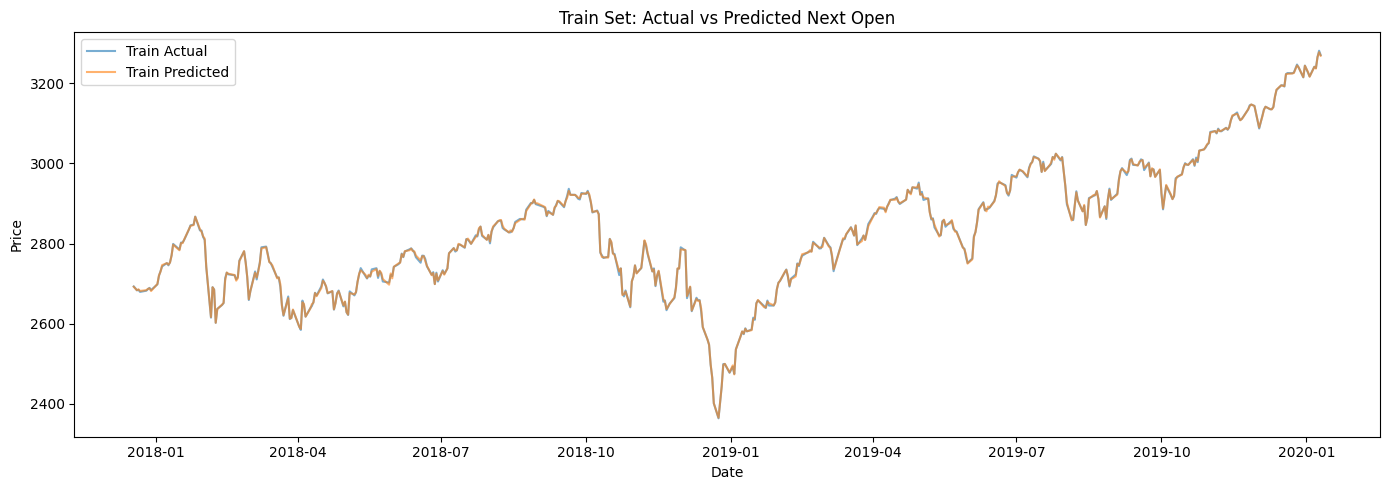

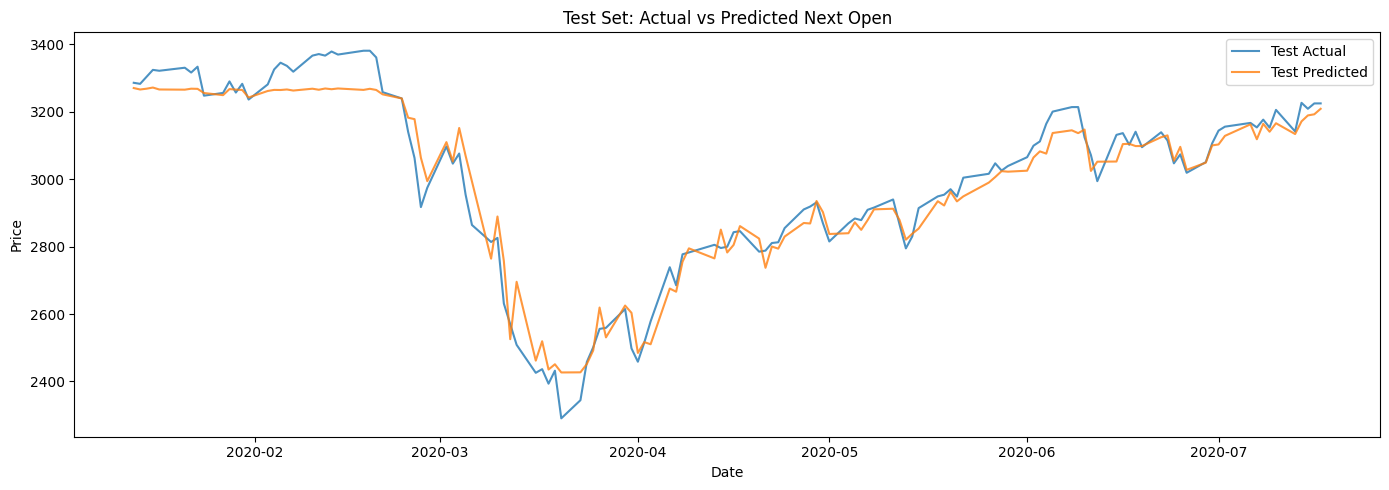

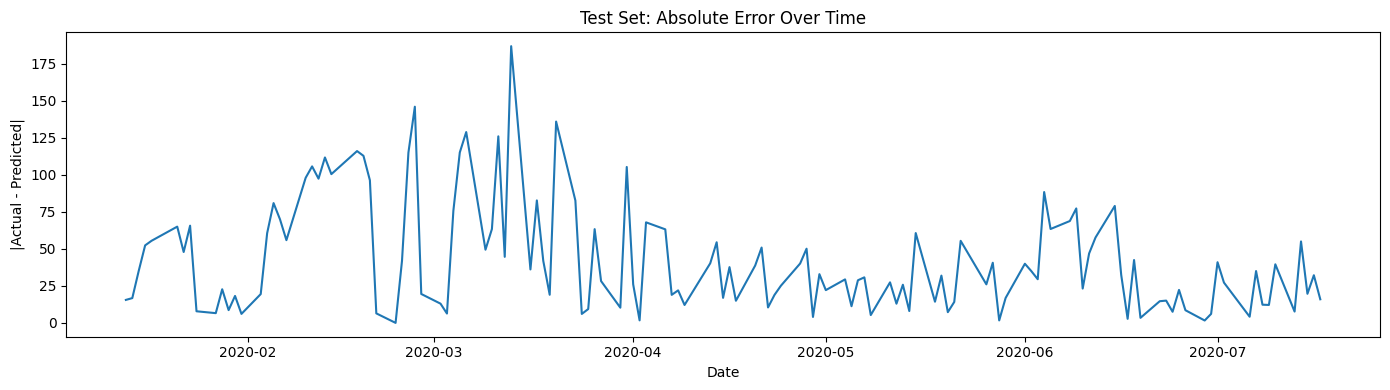

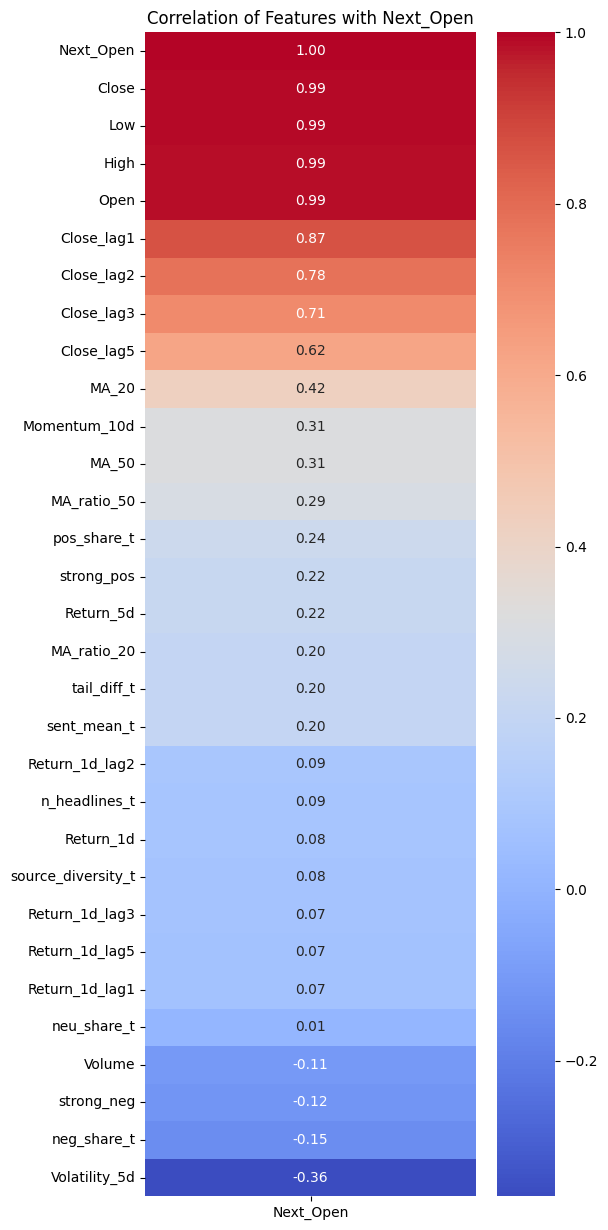

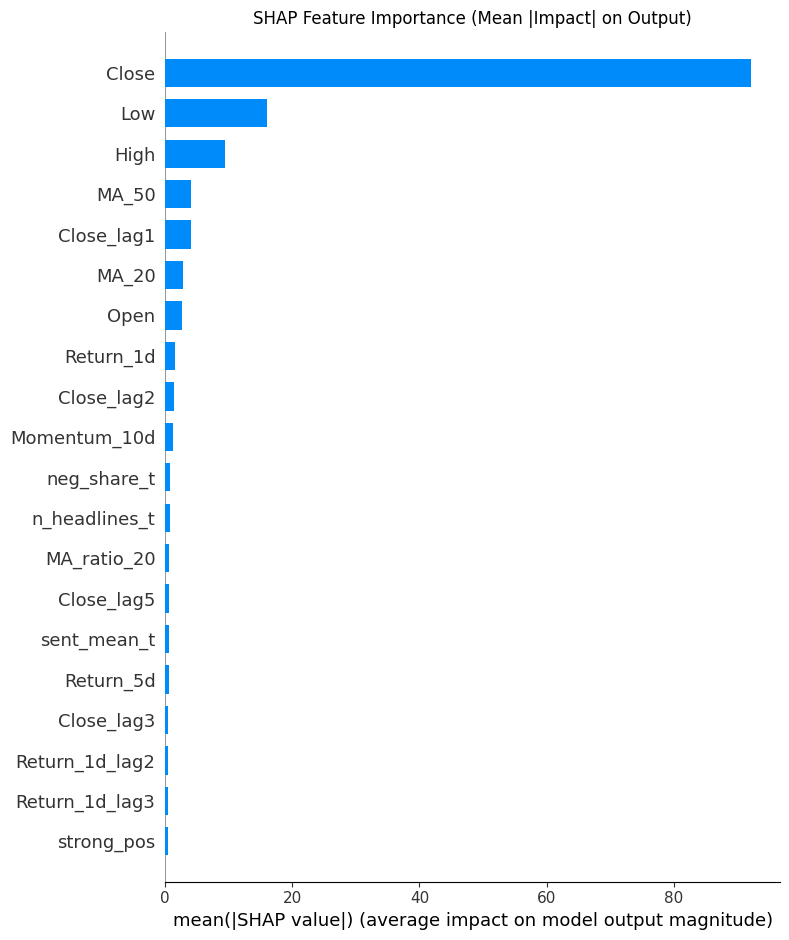

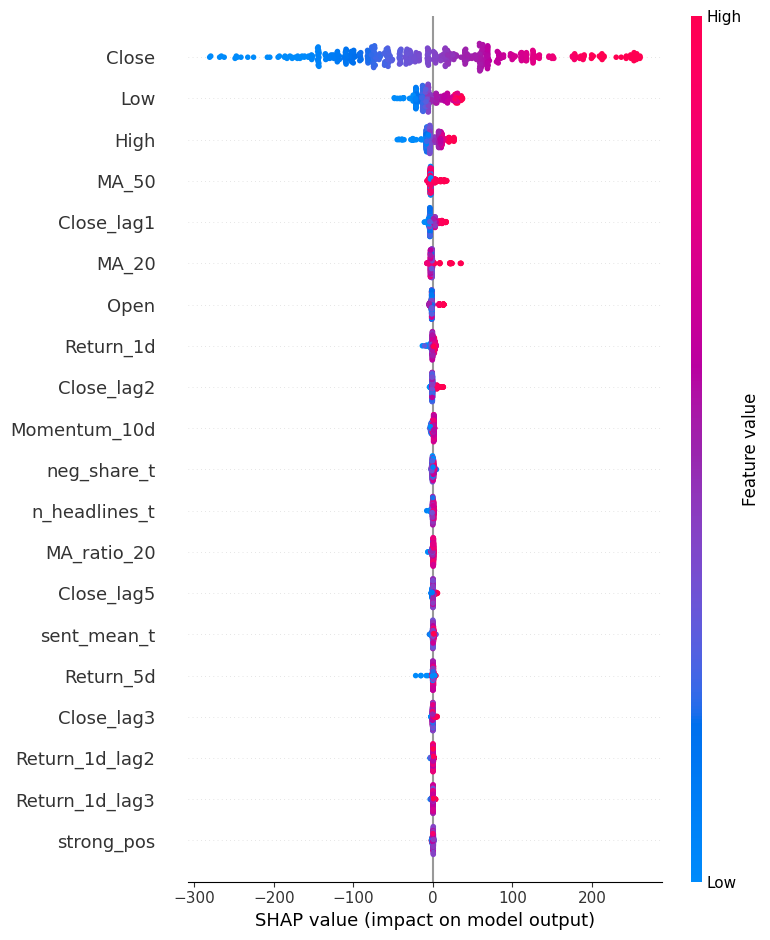

In [ ]:
#   1) PREP DATA: FEATURES, TARGET, TRAIN/TEST SPLIT (TIME-BASED)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TARGET: next day's opening price
target = "Next_Open"

# Drop rows where target is missing
df_feat = feat.dropna(subset=[target]).copy()

# Make sure Date is datetime (for plotting)
df_feat["Date"] = pd.to_datetime(df_feat["Date"])

# Feature columns: everything except Date + target
drop_cols = ["Date", target]
feature_cols = [c for c in df_feat.columns if c not in drop_cols]

X = df_feat[feature_cols].copy()
y = df_feat[target].copy()

# Safety: replace inf / -inf and any remaining NaNs
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

# 80/20 TIME-BASED SPLIT
split_idx = int(len(df_feat) * 0.8)  # first 80% train, last 20% test

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

dates_train = df_feat["Date"].iloc[:split_idx].reset_index(drop=True)
dates_test  = df_feat["Date"].iloc[split_idx:].reset_index(drop=True)

print(f"Train shape: X={X_train.shape}, y={y_train.shape}")
print(f"Test  shape: X={X_test.shape},  y={y_test.shape}")


#   2) TRAIN XGBOOST REGRESSOR & COMPARE TRAIN / TEST METRICS

import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# You can tweak these later during optimization
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred  = xgb_model.predict(X_test)

def eval_regression(y_true, y_pred, label=""):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    print(f"{label}RMSE: {rmse:.3f} | MAE: {mae:.3f} | R²: {r2:.3f}")
    return rmse, mae, r2

print("\n=== Performance on TRAIN set ===")
train_rmse, train_mae, train_r2 = eval_regression(y_train, y_train_pred, "Train ")

print("\n=== Performance on TEST set (20% hold-out) ===")
test_rmse, test_mae, test_r2 = eval_regression(y_test, y_test_pred, "Test  ")


#   3) VISUAL COMPARISON OVER TIME (TRAIN vs TEST)

# Build DataFrames for plotting
train_plot = pd.DataFrame({
    "Date": dates_train,
    "Actual": y_train.values,
    "Predicted": y_train_pred
})

test_plot = pd.DataFrame({
    "Date": dates_test,
    "Actual": y_test.values,
    "Predicted": y_test_pred
})

plt.figure(figsize=(14,5))
plt.plot(train_plot["Date"], train_plot["Actual"],   label="Train Actual",   alpha=0.6)
plt.plot(train_plot["Date"], train_plot["Predicted"],label="Train Predicted",alpha=0.6)
plt.title("Train Set: Actual vs Predicted Next Open")
plt.xlabel("Date"); plt.ylabel("Price")
plt.legend(); plt.tight_layout()
plt.show()

plt.figure(figsize=(14,5))
plt.plot(test_plot["Date"], test_plot["Actual"],    label="Test Actual",   alpha=0.8)
plt.plot(test_plot["Date"], test_plot["Predicted"], label="Test Predicted",alpha=0.8)
plt.title("Test Set: Actual vs Predicted Next Open")
plt.xlabel("Date"); plt.ylabel("Price")
plt.legend(); plt.tight_layout()
plt.show()

# Optional: absolute error over time (helps show overfitting)
test_plot["AbsError"] = np.abs(test_plot["Actual"] - test_plot["Predicted"])
plt.figure(figsize=(14,4))
plt.plot(test_plot["Date"], test_plot["AbsError"])
plt.title("Test Set: Absolute Error Over Time")
plt.xlabel("Date"); plt.ylabel("|Actual - Predicted|")
plt.tight_layout()
plt.show()


#   4) CORRELATION HEATMAP (FEATURES vs TARGET)

import seaborn as sns

corr = df_feat[feature_cols + [target]].corr()

# Correlation of each feature with target, sorted
corr_target = corr[target].sort_values(ascending=False)

plt.figure(figsize=(6, len(corr_target) / 2.5))
sns.heatmap(corr_target.to_frame(), annot=True, fmt=".2f",
            cmap="coolwarm", cbar=True)
plt.title(f"Correlation of Features with {target}")
plt.tight_layout()
plt.show()

# If you prefer a full heatmap (can get busy with many features):
# plt.figure(figsize=(12,10))
# sns.heatmap(corr, cmap="coolwarm", center=0)
# plt.title("Feature Correlation Matrix")
# plt.tight_layout()
# plt.show()


#   5) SHAP ANALYSIS – FEATURE IMPACT & SENSITIVITY

# Install shap once (you can comment this out after first run)
# !pip install shap

import shap
shap.initjs()

# TreeExplainer works great with XGBoost
explainer = shap.TreeExplainer(xgb_model)

# Use a sample of training data for speed if dataset is large
if len(X_train) > 1000:
    X_shap = X_train.sample(1000, random_state=42)
else:
    X_shap = X_train

shap_values = explainer.shap_values(X_shap)

# 5a) Bar plot: which features matter most on average?
shap.summary_plot(shap_values, X_shap, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Mean |Impact| on Output)")
plt.tight_layout()
plt.show()

# 5b) Detailed summary: how features push predictions up/down
shap.summary_plot(shap_values, X_shap, show=True)


## Modeling


In [ ]:
#  CLEAN DATA, DEFINE TARGET, TRAIN/TEST SPLIT

# Our target is NEXT DAY OPEN price
target = "Next_Open"

# Drop rows missing the target
df_feat = feat.dropna(subset=[target]).copy()

# Convert dates for plotting
df_feat["Date"] = pd.to_datetime(df_feat["Date"])

# Features = all columns except Date + Target
drop_cols = ["Date", target]
feature_cols = [c for c in df_feat.columns if c not in drop_cols]

# X = features, y = target price
X = df_feat[feature_cols].replace([np.inf, -np.inf], np.nan).fillna(0)
y = df_feat[target]

# Time-based 80/20 split
split_idx = int(len(df_feat) * 0.8)

X_train = X.iloc[:split_idx]
y_train = y.iloc[:split_idx]

X_test  = X.iloc[split_idx:]
y_test  = y.iloc[split_idx:]

dates_train = df_feat["Date"].iloc[:split_idx].reset_index(drop=True)
dates_test  = df_feat["Date"].iloc[split_idx:].reset_index(drop=True)

print("TRAIN SHAPE:", X_train.shape, y_train.shape)
print("TEST SHAPE:",  X_test.shape, y_test.shape)


#  TRAIN MODEL
import xgboost as xgb

model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=350,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

model.fit(X_train, y_train)


#  PREDICTION

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)


#  EVALUATE (MAE, RMSE, R²)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred, name=""):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))   # FIXED HERE
    r2   = r2_score(y_true, y_pred)

    print(f"\n{name} MAE:  {mae:.3f}")
    print(f"{name} RMSE: {rmse:.3f}")
    print(f"{name} R²:   {r2:.4f}")

    return mae, rmse, r2


#  Store for later plotting

train_df = pd.DataFrame({"Date": dates_train, "Actual": y_train.values, "Predicted": y_pred_train})
test_df  = pd.DataFrame({"Date": dates_test,  "Actual": y_test.values,  "Predicted": y_pred_test})


TRAIN SHAPE: (519, 30) (519,)
TEST SHAPE: (130, 30) (130,)


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

split_idx = int(len(feat)*0.8)
X_train, y_train = X.iloc[:split_idx], y.iloc[:split_idx]
X_test,  y_test  = X.iloc[split_idx:],  y.iloc[split_idx:]

graph_final = df_feat[['Date']].iloc[split_idx:]
model = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.3f}')
print(f'R²: {r2:.3f}')

RMSE: 59.343
R²: 0.952


In [ ]:
#NEW
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingRegressor

ridge = Ridge(alpha=0.5)
xgb2 = xgb.XGBRegressor(
   objective='reg:squarederror',
   n_estimators=400, learning_rate=0.05, max_depth=3,
   subsample=0.9, colsample_bytree=0.9
)
ensemble = VotingRegressor([('ridge', ridge), ('xgb', xgb2)])
ensemble.fit(X_train, y_train)
y_pred_log = ensemble.predict(X_test)


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.23442e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': np.arange(3, 9, 2),
    'learning_rate': np.arange(0.01, 0.18, 0.04),
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': np.float64(0.13), 'max_depth': np.int64(7), 'subsample': 0.8}


In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)
graph_final['Predict'] = y_pred
graph_final['Actual'] = y_test

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.3f}')
print(f'R²: {r2:.3f}')

RMSE: 52.781
R²: 0.962


In [ ]:
# Directional Accuracy predicts the direction of movement (up or down).
import numpy as np
import pandas as pd

# Convert to Pandas Series so we can use .diff()
y_test_series = pd.Series(y_test).reset_index(drop=True)
y_pred_series = pd.Series(y_pred).reset_index(drop=True)

# Calculate directional accuracy (percentage of correct up/down predictions)
direction_acc = np.mean(np.sign(y_pred_series.diff()) == np.sign(y_test_series.diff()))
print(f'Directional Accuracy: {direction_acc:.2%}')


Directional Accuracy: 70.77%


In [ ]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.3f}')

MAE: 40.201


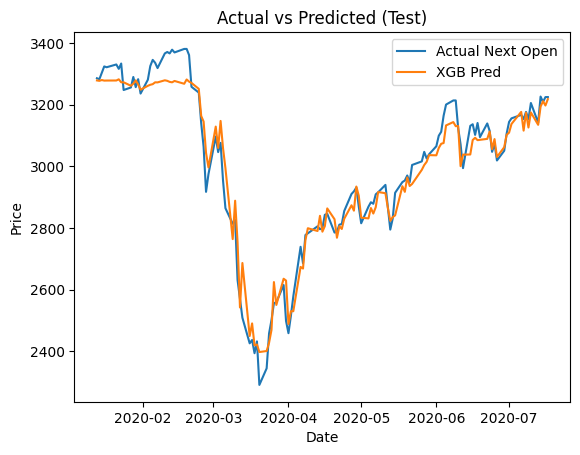

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(graph_final["Date"], graph_final["Actual"], label="Actual Next Open")
plt.plot(graph_final["Date"], graph_final["Predict"], label="XGB Pred")
plt.legend()
plt.title("Actual vs Predicted (Test)")
plt.xlabel("Date"); plt.ylabel("Price")
plt.show()

In [ ]:
# More New Code

In [ ]:
import yfinance as yf
import pandas as pd

NEW_START = "2023-01-01"
NEW_END   = None

# Download new data
new_data = yf.download(
    "^GSPC",
    start=NEW_START,
    end=NEW_END,
    auto_adjust=False,
    actions=False
)

# 1. Flatten columns
new_data.columns = [col[0] for col in new_data.columns]

new_data = new_data.reset_index()

print("Columns after flattening:", new_data.columns.tolist())
print(new_data.head())

# 2. create Next_Open
new_data["Next_Open"] = new_data["Open"].shift(-1)

# 3. drop last row (since it has no next day's open)
new_data = new_data.dropna(subset=["Next_Open"])

print("Prepared new dataset:", new_data.head())


[*********************100%***********************]  1 of 1 completed

Columns after flattening: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
        Date    Adj Close        Close         High          Low         Open  \
0 2023-01-03  3824.139893  3824.139893  3878.459961  3794.330078  3853.290039   
1 2023-01-04  3852.969971  3852.969971  3873.159912  3815.770020  3840.360107   
2 2023-01-05  3808.100098  3808.100098  3839.739990  3802.419922  3839.739990   
3 2023-01-06  3895.080078  3895.080078  3906.189941  3809.560059  3823.370117   
4 2023-01-09  3892.090088  3892.090088  3950.570068  3890.419922  3910.820068   

       Volume  
0  3959140000  
1  4414080000  
2  3893450000  
3  3923560000  
4  4311770000  
Prepared new dataset:         Date    Adj Close        Close         High          Low         Open  \
0 2023-01-03  3824.139893  3824.139893  3878.459961  3794.330078  3853.290039   
1 2023-01-04  3852.969971  3852.969971  3873.159912  3815.770020  3840.360107   
2 2023-01-05  3808.100098  3808.100098  3839.739990  3802.4199

In [ ]:
#                MODEL PERFORMANCE SUMMARY

import numpy as np
import pandas as pd

print("\n\n" + " "*70)
print("                 FINAL MODEL SUMMARY")
print(" "*70)

# 1. BASIC METRICS
print("\n OVERALL REGRESSION PERFORMANCE")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train MAE : {train_mae:.4f}")
print(f"Train R²  : {train_r2:.4f}")

print(f"\nTest RMSE:  {test_rmse:.4f}")
print(f"Test MAE :  {test_mae:.4f}")
print(f"Test R²  :  {test_r2:.4f}")

# Directional Accuracy
print(f"\nDirectional Accuracy (Up/Down Prediction): {direction_acc:.2%}")

print(f"\nDataset Size: {len(df_feat)} samples")
print(f"Train Samples: {len(X_train)} | Test Samples: {len(X_test)}")


# 2. TOP FEATURE IMPORTANCES
print("\n TOP 10 MOST IMPORTANT FEATURES")

# Get importance values from XGBoost
importance = model.feature_importances_
feature_importance_df = (
    pd.DataFrame({"feature": X.columns, "importance": importance})
    .sort_values("importance", ascending=False)
    .head(10)
)

print(feature_importance_df.to_string(index=False))


# 3. SAMPLE PREDICTIONS
print("\n RANDOM PREDICTION EXAMPLES (Test Set)")

test_examples = test_df.sample(5, random_state=42)

for i, row in test_examples.iterrows():
    actual  = row["Actual"]
    pred    = row["Predicted"]
    err_pct = abs(actual - pred) / actual * 100
    print(f"Date: {row['Date'].date()} | "
          f"Predicted=${pred:.2f} | Actual=${actual:.2f} "
          f"| Error: {err_pct:.2f}%")

# 4. SIMPLE TRADING STRATEGY SIMULATION
print("\n SIMPLE TRADING STRATEGY (LONG IF PREDICTED UP)")

# If predicted next open > today's open → buy
signals = np.sign(test_df["Predicted"].diff())
true_moves = np.sign(test_df["Actual"].diff())

strategy_returns = (signals == true_moves).mean()    # win rate
buy_hold_return = (test_df["Actual"].iloc[-1] / test_df["Actual"].iloc[0]) - 1

print(f"Strategy Accuracy: {strategy_returns:.4f}")
print(f"Buy & Hold Return: {buy_hold_return:.4f} ({buy_hold_return*100:.2f}%)")

print("\n\n" + " "*70)
print("         END OF SUMMARY")
print(" "*70)




                                                                      
                 FINAL MODEL SUMMARY
                                                                      

 OVERALL REGRESSION PERFORMANCE
Train RMSE: 2.4590
Train MAE : 1.9274
Train R²  : 0.9998

Test RMSE:  55.8872
Test MAE :  42.2967
Test R²  :  0.9575

Directional Accuracy (Up/Down Prediction): 70.77%

Dataset Size: 649 samples
Train Samples: 519 | Test Samples: 130

 TOP 10 MOST IMPORTANT FEATURES
   feature  importance
     Close    0.430981
     MA_50    0.232453
      High    0.221149
Close_lag2    0.056249
     MA_20    0.024714
       Low    0.020685
Close_lag1    0.003098
 Return_5d    0.002366
Close_lag5    0.001787
      Open    0.001603

 RANDOM PREDICTION EXAMPLES (Test Set)
Date: 2020-04-01 | Predicted=$2484.68 | Actual=$2458.54 | Error: 1.06%
Date: 2020-03-11 | Predicted=$2757.47 | Actual=$2630.86 | Error: 4.81%
Date: 2020-02-10 | Predicted=$3268.14 | Actual=$3365.87 | Error: 2.90%
Date: 2020-02

In [ ]:
pip install --upgrade gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.6/21.6 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 1.14.0
    Uninstalling gradio_client-1.14.0:
      Successfully uninstalled gradio_client-1.14.0
  Attempting uninstall: gradio
    Found existing installation: gradio 5.50.0
    Uninstalling gradio-5.50.0:
      Successfully uninstalled gradio-5.50.0


In [ ]:
import shap
explainer = shap.TreeExplainer(model)


In [ ]:
import gradio as gr
import pandas as pd
import plotly.graph_objects as go

# Trading Signal Logic
def get_trading_signal(pred_open, current_close):
    pct_change = (pred_open - current_close) / current_close
    if pct_change > 0.002:
        return "BUY", pct_change
    elif pct_change < -0.002:
        return "SELL", pct_change
    else:
        return "HOLD", pct_change


# Generate Interactive Plotly Chart
def build_plot(idx):

    start_i = max(0, idx - 5)
    end_i = min(len(df_feat) - 1, idx + 5)
    subset = df_feat.iloc[start_i:end_i+1]

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=subset["Date"],
        y=subset["Open"],
        mode="lines+markers",
        hovertemplate="Date: %{x}<br>Open: $%{y:.2f}<extra></extra>",
        name="Open Price"
    ))

    fig.add_vline(
        x=df_feat["Date"].iloc[idx],
        line_width=2,
        line_dash="dash",
        line_color="red"
    )

    fig.update_layout(
        title="Open Prices Around Selected Date",
        xaxis_title="Date",
        yaxis_title="Open Price ($)",
        hovermode="x unified",
        template="plotly_white",
        height=400
    )

    return fig


# SHAP Features Table (Renamed Columns & Features)
def top_feature_table(shap_values, X_row):

    vals = shap_values[0]

    df_imp = pd.DataFrame({
        "Feature": X.columns,
        "Price Impact": vals   # renamed column
    })

    # Rename misleading feature names
    rename_dict = {
        "MA_50": "50-Day Mov Avg",
        "Close_lag2": "Close 2 Days Prior"
    }
    df_imp["Feature"] = df_imp["Feature"].replace(rename_dict)

    # Sort by strongest impact
    df_imp = df_imp.reindex(df_imp["Price Impact"].abs().sort_values(ascending=False).index)

    # Show only top 5
    df_imp = df_imp.head(5)

    # Round impact values
    df_imp["Price Impact"] = df_imp["Price Impact"].round(3)

    return df_imp


# MAIN PREDICTION (DOES NOT SHOW ACTUAL PRICE)
def predict_for_date(date_str):

    if date_str not in df_feat["Date"].astype(str).values:
        return "N/A", "N/A", None, pd.DataFrame(), ""

    idx = df_feat.index[df_feat["Date"].astype(str) == date_str][0]

    X_row = X.loc[idx:idx]
    pred_open = model.predict(X_row)[0]
    current_close = df_feat.loc[idx, "Close"]

    signal, pct_change = get_trading_signal(pred_open, current_close)

    # Build plot
    fig = build_plot(idx)

    # Build SHAP top features
    shap_vals = explainer.shap_values(X_row)
    feature_table = top_feature_table(shap_vals, X_row)

    # Hide actual until button click
    actual_hidden = ""

    return (
        f"${pred_open:,.2f}",
        f"{signal} ({pct_change*100:.2f}%)",
        fig,
        feature_table,
        actual_hidden
    )


# REVEAL ACTUAL PRICE ONLY
def reveal_actual(date_str):
    idx = df_feat.index[df_feat["Date"].astype(str) == date_str][0]

    if idx + 1 < len(df_feat):
        actual_next = df_feat.loc[idx + 1, "Open"]
        return f"${actual_next:,.2f}"
    else:
        return "N/A"


# BUILD DROPDOWN APP
date_options = df_feat["Date"].astype(str).tolist()

with gr.Blocks(title="Stock Next-Day Open Predictor") as demo:

    gr.Markdown("## Next-Day Open Price Prediction Model")
    gr.Markdown("Select a date to see a model prediction and trading suggestion.")

    with gr.Row():
        date_dropdown = gr.Dropdown(
            label="Select a Trading Date",
            choices=date_options,
            value=date_options[0]
        )

        predict_btn = gr.Button("Get Prediction", variant="primary")

    predicted_output = gr.Textbox(label="Predicted Next-Day Open ($)")
    signal_output = gr.Textbox(label="Trading Suggestion")
    chart_output = gr.Plot(label="Open Price Chart")
    feature_output = gr.Dataframe(label="Top Feature Drivers (SHAP)", interactive=False)

    reveal_btn = gr.Button("Reveal Actual Next-Day Open", variant="primary")
    actual_output = gr.Textbox(label="Actual Next-Day Open ($)")

    # Button connections
    predict_btn.click(
        predict_for_date,
        inputs=[date_dropdown],
        outputs=[predicted_output, signal_output, chart_output, feature_output, actual_output]
    )

    reveal_btn.click(
        reveal_actual,
        inputs=[date_dropdown],
        outputs=[actual_output]
    )

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fa05545b70678a542b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
